In [75]:
import pandas as pd
import numpy as np
import os
cwd = os.getcwd()
cwd

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
SCOPE = 100

In [76]:
test = pd.DataFrame([(0.0, np.nan, -1.0, 1.0),
                   (np.nan, 2.0, np.nan, np.nan),
                   (np.nan, 2.0, np.nan, np.nan),
                   (np.nan, 2.0, np.nan, np.nan),
                   (np.nan, 2.0, np.nan, np.nan),
                   (np.nan, 2.0, np.nan, np.nan),
                   (2.0, 3.0, np.nan, 9.0),
                   (np.nan, 4.0, -4.0, 16.0)],
                  columns=list('abcd'))
#test

In [77]:
#test.interpolate(method='linear', limit_direction='both', axis=0)
#test.interpolate(method='polynomial', order=2)

In [78]:
PATH = '/work/bde'
MOBILITY = 'car'
download = f'{PATH}/Data/4Gdataset/{MOBILITY}/'
df_list = []
file_dir = download

for file in os.listdir(file_dir)[:]:
    #print(file)
    df = pd.read_csv(file_dir+file)
    #print(df.head())
    
    df = df[['Timestamp', 'Speed', 'CellID', 'RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate', 'UL_bitrate', 'NRxRSRP', 'NRxRSRQ']]
    df = df.replace('-', np.nan)
    
    df['date'] = pd.to_datetime(df['Timestamp'], format="%Y.%m.%d_%H.%M.%S")
    df = df.drop(columns=['Timestamp'])

    df['CellID'] = pd.to_numeric(df['CellID'])
    df['RSRP'] = pd.to_numeric(df['RSRP'])
    df['RSRQ'] = pd.to_numeric(df['RSRQ'])
    df['SNR'] = pd.to_numeric(df['SNR'])
    df['CQI'] = pd.to_numeric(df['CQI'])
    df['RSSI'] = pd.to_numeric(df['RSSI'])
    df['DL_bitrate'] = pd.to_numeric(df['DL_bitrate'])
    df['UL_bitrate'] = pd.to_numeric(df['UL_bitrate'])
    df['NRxRSRP'] = pd.to_numeric(df['NRxRSRP'])
    df['NRxRSRQ'] = pd.to_numeric(df['NRxRSRQ'])

    #df.interpolate(method='linear', limit_direction='both', axis=0, inplace=True)
    df = df.ffill(limit=5)
    df = df.fillna(0)

    df = df.sort_values('date')
    df = df.drop_duplicates(subset=['date'])
    #df.info()
    #df.info(show_counts=True)
    #print(df.head())
    #df.plot(subplots=True, layout=(3,3), figsize=(40, 25))
    #df.to_csv('5Gdataset-{}.csv'.format(file), encoding='utf-8', index=False)
    df_list.append(df)

In [79]:
df = pd.concat(df_list, axis=0)
df.sort_values('date', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75516 entries, 0 to 2012
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Speed       75516 non-null  int64         
 1   CellID      75516 non-null  int64         
 2   RSRP        75516 non-null  int64         
 3   RSRQ        75516 non-null  float64       
 4   SNR         75516 non-null  float64       
 5   CQI         75516 non-null  float64       
 6   RSSI        75516 non-null  float64       
 7   DL_bitrate  75516 non-null  int64         
 8   UL_bitrate  75516 non-null  int64         
 9   NRxRSRP     75516 non-null  float64       
 10  NRxRSRQ     75516 non-null  float64       
 11  date        75516 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 7.5 MB


In [80]:
df.head()

,Speed,CellID,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,NRxRSRP,NRxRSRQ,date
0,1,2,-111,-19.0,-13.0,2.0,-94.0,3176,59,-110.0,-17.0,2017-12-04 15:24:12
3,0,2,-111,-19.0,-12.0,2.0,-94.0,1330,64,-110.0,-16.0,2017-12-04 15:24:13
4,0,2,-113,-19.0,-13.0,3.0,-94.0,1140,52,-112.0,-16.0,2017-12-04 15:24:14
5,0,2,-113,-19.0,-13.0,2.0,-94.0,883,17,-112.0,-16.0,2017-12-04 15:24:15
6,0,2,-111,-17.0,-6.0,6.0,-94.0,682,32,-112.0,-16.0,2017-12-04 15:24:16


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75516 entries, 0 to 2012
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Speed       75516 non-null  int64         
 1   CellID      75516 non-null  int64         
 2   RSRP        75516 non-null  int64         
 3   RSRQ        75516 non-null  float64       
 4   SNR         75516 non-null  float64       
 5   CQI         75516 non-null  float64       
 6   RSSI        75516 non-null  float64       
 7   DL_bitrate  75516 non-null  int64         
 8   UL_bitrate  75516 non-null  int64         
 9   NRxRSRP     75516 non-null  float64       
 10  NRxRSRQ     75516 non-null  float64       
 11  date        75516 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 7.5 MB


In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
def multi_corr(feature):
    fig, ax = plt.subplots(1,3, figsize=(20, 6))

    # when the Pearson and Spearman values are not much different, 
    # our data tends to not have extreme values (outliers)
    corr1 = df.corr('pearson')[[feature]].sort_values(by=feature, ascending=False)
    corr2 = df.corr('spearman')[[feature]].sort_values(by=feature, ascending=False)

    corr3 = df.corr('kendall')[[feature]].sort_values(by=feature, ascending=False)
    #ordinal correlation (Spearman & Kendall Tau)

    sns.heatmap(corr1, ax=ax[0], annot=True)
    sns.heatmap(corr2, ax=ax[1], annot=True)
    sns.heatmap(corr3, ax=ax[2], annot=True)

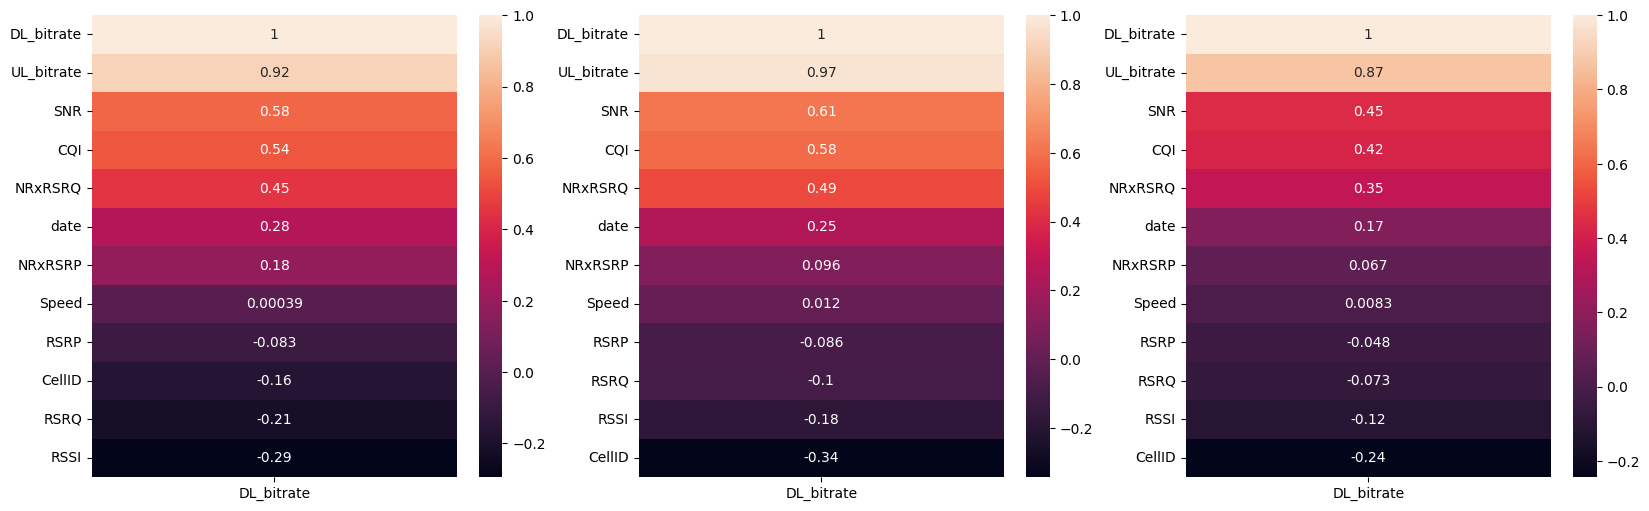

In [84]:
multi_corr('DL_bitrate')

In [85]:
df.to_csv(f'data/4Gdataset/{MOBILITY}.csv', encoding='utf-8', index=False)

In [86]:
# number of changes in values
(df != df.shift(axis=0)).sum(axis=0)

Speed         20169
CellID        21589
RSRP          41985
RSRQ          30520
SNR           34419
CQI           32460
RSSI          35456
DL_bitrate    74589
UL_bitrate    73918
NRxRSRP       26949
NRxRSRQ       26664
date          61222
dtype: int64